In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
np.random.seed(0)

# make random data

In [4]:
from sklearn.datasets import make_blobs
X,Y = make_blobs(n_samples=5000, n_features=2, centers=[[2,3],[5,6],[6,-2],[-3,6],[8,9]], cluster_std=1, random_state=101)

# see our data

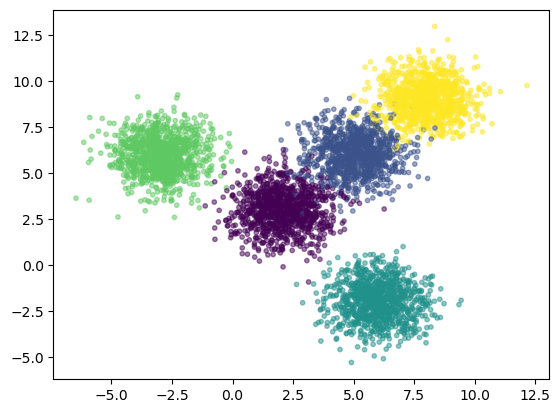

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=Y,alpha=0.5, s=10)
plt.show()

# k_means

In [6]:
k_means = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=32)
k_means=k_means.fit(X)

In [7]:
k_means_labels=k_means.labels_
k_means_labels

array([0, 4, 2, ..., 1, 0, 3])

# center of groups by model

In [8]:
k_means_cluster_centers=k_means.cluster_centers_
k_means_cluster_centers

array([[-2.95863298,  5.96810745],
       [ 5.05509077,  6.00871771],
       [ 5.98841646, -1.95865424],
       [ 2.05048747,  3.00087126],
       [ 7.99647469,  9.02939991]])

# Elbow method

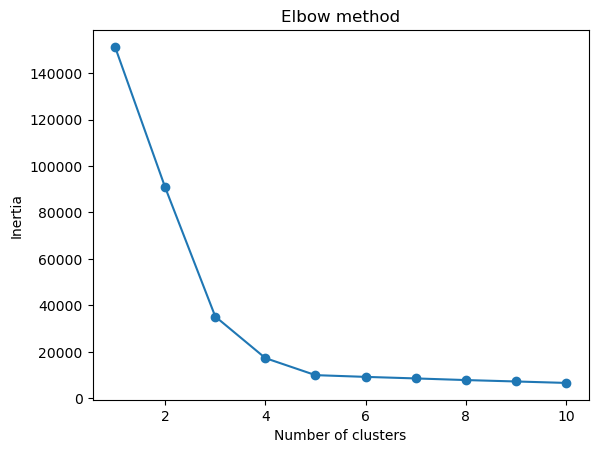

6607.142591401964

In [9]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


## visualize by model

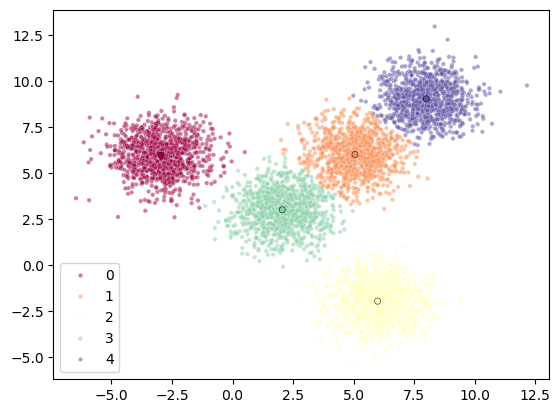

In [15]:
import seaborn as sns
colors = ['r', 'g', 'b', 'y']
num_clusters = 5
color = list(plt.cm.Spectral(np.linspace(0, 1, num_clusters)))
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=k_means_labels, palette=color, alpha=0.5, s=10)
ax = sns.scatterplot(x=k_means_cluster_centers[:, 0], y=k_means_cluster_centers[:, 1],
                     hue=range(num_clusters), palette=color, s=20, ec='black', legend=False, ax=ax)
plt.show()